# Machine Learning Titanic Courswork

## Courswork Task
“The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew.** This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were **not enough lifeboats for the passengers and crew. Although there was some element of luck involved** in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.”

For this assignment you will **analyse the Titanic dataset with regards to predicting what categories of passengers were likely to survive** the sinking of the ocean liner. You will be **using machine learning methods to predict** as accurate as possible from general information about passengers which **passengers survived the tragedy.**

### Experiments

Develop a complete analysis pipeline in a programming language / environment of your choice. 

The objective of the analysis is to predict survivors of the Titanic disaster from the given data as accurately as possible.

There are no limitations with regards to the modelling approach, that is, you are free to explore (and report) as many methods, and their results, as you wish. The minimum requirement though is that you analyse the dataset using the following two classifiers:
- Logistic regression classifier
- Random forest classifier

You will report the results of your experiments through prediction, that is, classification accuracies with regard to correctly predicted survival rates.

# Data Dictionary & General Setup
The data provided for this assignment has been split into a training set and a test set, this test test set is also the ground truth.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Pallet
#sns.set_palette("pastel")

In [2]:
# Importing Datasets
test_df = pd.read_csv('testdata_with_groundTruth.csv')
train_df = pd.read_csv('train.csv')

## Test Data

### Overview

In [3]:
print("Test Data Dimensions <Rows, Cols>: " + str(test_df.shape))
test_df.head(5)

Test Data Dimensions <Rows, Cols>: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Quality
The 9 of the 12 columns are complete with no NaN's, Fare has one missing value, Age has 82 missing values and Cabin has 327 missing values. Age and Fare should be easy to impute based on other columns, but Cabin may be an issue and might not be worth imputing at all.

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Training Data

### Overview

In [5]:
print("Training Data Dimensions <Rows, Cols>: " + str(train_df.shape))
train_df.head(5)

Training Data Dimensions <Rows, Cols>: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quality
9 out of the 12 columns have no NaN values. Age has 177 missing values and Cabin has 687 missing values. Similarly to the test set, Age will be easy to impute but Cabin may be an issue.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dictionary

|Attribute |Description |Possible Values |
|----------|------------|----------------|
|Survived  |If they Survived or not|0 = no, 1 = yes|
|Pclass    |Class of the passengers ticket|1 = First, 2 = Second and 3 = Third|
|Name      |Name of Passenger, including Title|Mr John Doe (String)|
|Sex       |Gender|Male, Female|
|Age       |Age of the passenger| 50 (Int)|
|Sibsp     |Number of Siblings/Spouses Aboard|2 (int)|
|Parch     |Number of Parents/Children Aboard|2 (int)|
|Ticket    |Ticket Number|PC127321 (String, no form)|
|Fare      |Fare Passenger paind for ticket|120 (int)|
|Cabin     |Cabin than Passenger had, if they had one|C123 (String)|
|Embarked  |Location they Boarded the Titanic|C = Cherbourg; Q = Queenstown; S = Southampton|

# Graphical Understanding of the Features
In this section I will graphical represent the features in the training data to see if there is any correlation between the values of the feature and if they survived or not. Im this I will not look at PassengerId as it is has been added after the event for data management purposes, Name as this is most likely unique to an indivdual and an overall trend should not be visable and Ticket as this is unique to an individual and an overall trend should not be visible.

## Pclass
For the survivors, there is not a lot of difference between the 3 classes, but second class had the least survivors. For the perished, third class had over 3 times as many as fatalities as any other class. When comparing the number of individuals per class, you can see that first and second class have similar passenger numbers with similar passenger survived/perished, but third class had the highest number of passengers but also the highest proportion of people that perished.

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


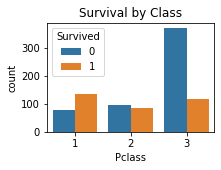

In [7]:
plt.figure(figsize = (3, 2))
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df).set_title("Survival by Class")
print(train_df.groupby(['Pclass']).count().iloc[:,0])

Text(0.5, 1.0, 'Sex by Class')

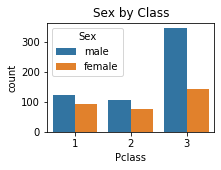

In [8]:
plt.figure(figsize = (3, 2))
sns.countplot(x = 'Pclass', hue = 'Sex', data = train_df).set_title("Sex by Class")

In [9]:
train_df.groupby(['Pclass']).count().iloc[:,1]

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

## Sex
When looking at Sex, it is clear that Males had the highest fatality rate.

Text(0.5, 1.0, 'Survival by Sex')

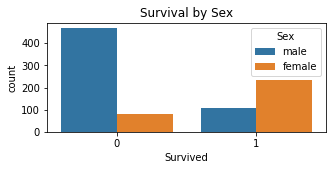

In [10]:
plt.figure(figsize = (5, 2))
sns.countplot(x = 'Survived', hue = 'Sex', data = train_df).set_title("Survival by Sex")

In [11]:
train_df.groupby(['Sex']).count().iloc[:,1]

Sex
female    314
male      577
Name: Survived, dtype: int64

## Age
Children under 15 had the highest survivorship rate, with individuals aged 15 to 50 had a low chance of surviving. I suspect that Sex had a major role in determaning if you survived especially if you were over the age of 18.

Text(0.5, 1.0, 'Survival by Age Group')

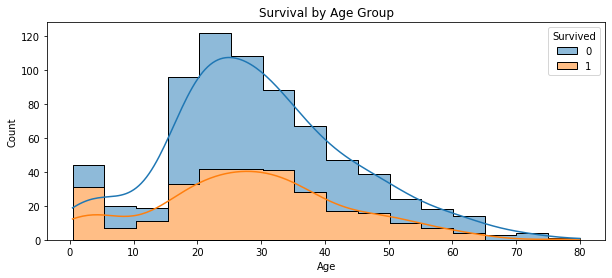

In [12]:
plt.figure(figsize = (10, 4))
sns.histplot(data = train_df, x="Age", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 16).set_title("Survival by Age Group")

## SibSp
Lone passengers had the highest fatlity rate.

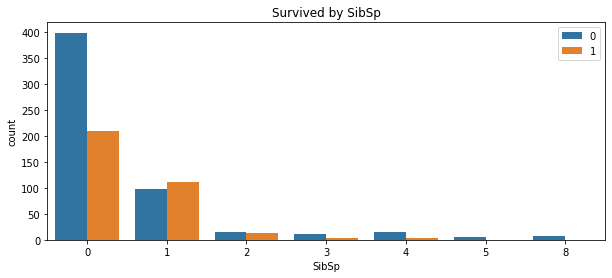

In [13]:
plt.figure(figsize = (10, 4))

sns.countplot(data = train_df, x="SibSp", hue = "Survived").set_title("Survived by SibSp")
plt.legend(loc="upper right")

## Parch
Lone passengers had the highest fatility rate, with people that travelled with family tended to have a higher level of survival.

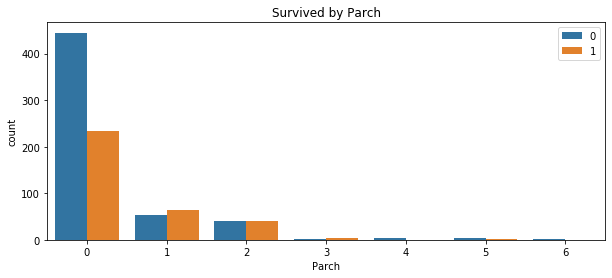

In [14]:
plt.figure(figsize = (10, 4))
sns.countplot(data = train_df, x="Parch", hue = "Survived").set_title("Survived by Parch")
plt.legend(loc="upper right")

## Fare
The majority of individuals had a low fare price, this is inline with the majority of passengers travelled third class.

Text(0.5, 1.0, 'Survide by Passenger Fare')

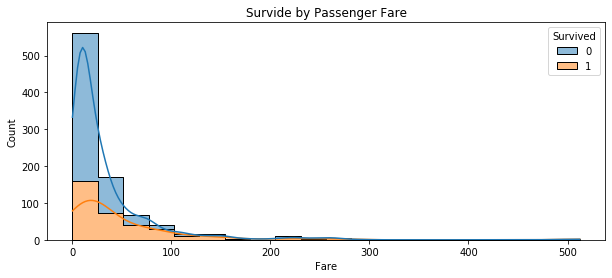

In [15]:
plt.figure(figsize = (10, 4))
sns.histplot(data = train_df, x="Fare", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 20).set_title("Survide by Passenger Fare")

## Embarked
The majority of people got on the ship at Southhampton, and that port has a higher rate of death.

Text(0.5, 1.0, 'Survived by Embarked')

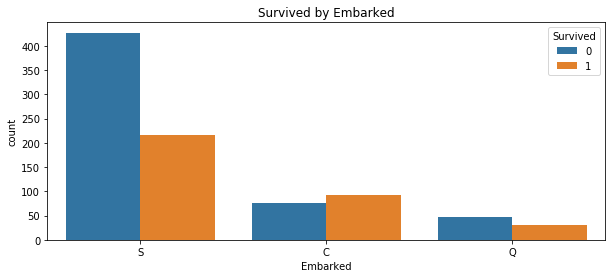

In [16]:
plt.figure(figsize = (10, 4))
sns.countplot(data = train_df, x="Embarked", hue = "Survived").set_title("Survived by Embarked")

## Survived

Text(0.5, 1.0, 'Count of Survived')

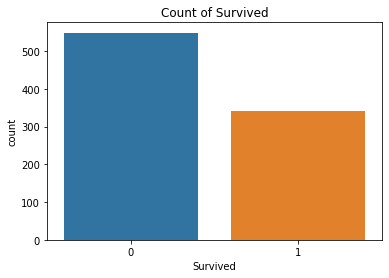

In [17]:
sns.countplot(data = train_df, x = "Survived").set_title("Count of Survived")

In [18]:
te_su = test_df.groupby(['Survived']).count().iloc[:,1]
tr_su = train_df.groupby(['Survived']).count().iloc[:,1]
print("Train Set Survival rate: " + str(round(100 - ((tr_su[1] / tr_su[0]) * 100), 2)))
print("Test Set Survival rate: " + str(round(100 - ((te_su[1] / te_su[0]) * 100), 2)))

Train Set Survival rate: 37.7
Test Set Survival rate: 39.23


## Correlation Summary
Below is a correlation matrix between all the varibles, most notable the line comparing variables to Survived we can see that Pclass and Sex have some of the strongets correlations, these are negative correlations due to younger people having higher chance of survival and Female is assigned the numerical value 0.

Text(0.5, 1, 'Feature Correlation')

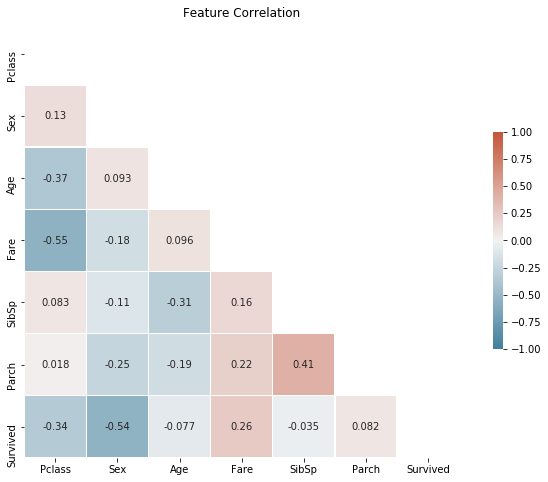

In [19]:
plt.figure(figsize = (12, 8))

scrap_train_df = train_df.copy()
#scrap_train_df['Sex'] = train_df['Sex'].astype('category').cat.codes
#scrap_train_df = pd.get_dummies(scrap_train_df, columns=['Embarked'])
#corr = scrap_train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']].corr()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
scrap_train_df['Sex'] = le.fit_transform(scrap_train_df['Sex'])

corr = scrap_train_df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True).set_title("Feature Correlation")

# Feature Extraction
Some of the features are not compatable in there raw form to be put into a model but there still might be information there, I can engineer new features with the extracted information.

**Features to Extract:**
- Title from Name, could help impute Age more accurately. I will do this trough regex as from initial looking all titles are followed by a '.' .
- Family Size, There could be some relation to the size of the family and if they survived or not.
- Age Category, as identified in the analysis Age shows to have no strong correlation with survived but is known that children had a high survivability rate. So this feature should help the ML model identify that a child has a higher survivorbility rate than an adult much quicker. I will also add a category for individuals over 50 as they had proportionally higher survivorbility rates.

In [20]:
train_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**Proofing Engineering Title &  Pre-Work**

Finding out the spread of Titles across the datasets, I will make some titles that only occur a very small amount of times into more common titles to not pollute the machine learning models with too much finite information.

In [21]:
scrap_train_df = train_df.copy()
scrap_train_df['Title'] = scrap_train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
print(scrap_train_df.groupby(['Title']).count().iloc[:,0].sum())
scrap_train_df.groupby(['Title']).count().iloc[:,0]

891


Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [22]:
scrap_train_df = test_df.copy()
scrap_train_df['Title'] = scrap_train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
print(scrap_train_df.groupby(['Title']).count().iloc[:,0].sum())
scrap_train_df.groupby(['Title']).count().iloc[:,0]

418


Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: PassengerId, dtype: int64

## Feature Engineering Functions

In [23]:
# Engineering Title
def engineer_title(df):
    """
    Engineering Title from name feature. Takes Titanic Dataframe with NO Missing Name Values. Extracts the Feature Title and Sets Makes some rare titles more common.
    """
    # Create Title
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
    
    # Map Rare Titles Across
    title_map = {'Capt':'Mr', 'Col':'Mr', 'Countess':'Mrs', 'Don':'Mr', 'Jonkheer':'Mrs',
                'Lady':'Mrs', 'Major':'Mr', 'Mlle':'Mrs', 'Mme':'Mrs', 'Ms':'Miss', 'Sir':'Mr',
                'Dona':'Mrs'}
    df.replace({'Title': title_map}, inplace=True)
    return df

# Engineering Family Members
def engineer_family_members(df):
    """
    Takes the titanic dataframe with NO MISSING VALUES and creates a collumn for the number of family members.
    """
    df['FamilyMembers'] = df['Parch'] + df['SibSp'] + 1
    return df

# Engineer Family Name REDUNDANT
def engineer_family_name(df):
    """
    Takes the Titanic dataframe with No Missing Values in the Name Column and produces a column Family Name.
    """
    df['FamilyName'] = scrap_train_df['Name'].str.extract(r'^([\w\-]+)', expand=True)
    return df

def engineer_age_cat(df):
    """
    Takes the titanic dataframe with NO MISSING VALUES and creates a collumn for age category.
    """
    cat = []
    for index, row in df.iterrows():
        if df.at[index, 'Age'] < 12:
            cat.append("child")
        elif (df.at[index, 'Age'] >= 12) & (df.at[index, 'Age'] < 19):
            cat.append("teenager" )
        elif (df.at[index, 'Age'] >= 19) & (df.at[index, 'Age'] < 50):
            cat.append("adult")
        else:
            cat.append("elderly")
    df['AgeCat'] = cat
    return df


# Data Selection & Cleaning Pipeline
- Add the the Features Outlined Above.
- Feature Selection.
- Clean The Data by filling in missing values.

In [24]:
# Cleaner Function
def cleaner(df, tr_df, cols):
    """
    Takes the both titanic datasets and calls the feature engineering functions, then selects the features ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",
             "FamilyMembers", "Title", "Survived"]. With it then imputes the missing values from the Age, Fare and Embarked Features.
    """
    # Add Features
    df = engineer_family_members(df)
    df = engineer_title(df)
    df = engineer_age_cat(df)
    
    print(df.columns)
    # Clean Embarked
    df['Embarked'].fillna(tr_df['Embarked'].mode()[0], inplace = True)
    # Clean Age
    # Full list of Titles
    titles = pd.concat([df, tr_df])["Title"].unique()
    # cond & val loop filler
    cond = []
    val = []
    for i in titles:
        cond.append(df.Title == i)
        val.append(round(df[(df.Title == i)].Age.mean()))
    df['Age'] = np.where(df['Age'].isnull(), np.select(cond, val), df['Age'])
    
    # Clean Fare
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(df[['Fare']])
    df['Fare'] = imp.transform(df[['Fare']]).ravel()
    
    # Feature Selection
    df = df[cols].copy()
    
    # Return Data
    return df

# Data Preperation Pipeline
The dataset has multiple variables that need work before being passed into the machine learning models. These variables are:
- Pclass - OneHot Encode - Pclass will most likely have an effect on the survival rate, but it needs to be OneHot encoded as the values [1,2,3] are categories without a linear relationship.
- Sex - OneHot Encode - This is a categorical text field that cannot be put into a model, so this will become 0 and 1.
- Embarked - OneHot Encoded - 3 potential letter values.
- Title - OneHot Encoded - Text field needs to be converted

**All Variables will then be scaled**

In [25]:
def prepare(tr_df, te_df, ohe_idx):
    # Join the datasets for a full encoding library can be fitted
    full_df = pd.concat([tr_df, te_df])
    full_df = full_df.iloc[:, :-1]
    # One Hot Encoding the Variables
    print(full_df.columns)
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ohe_idx)]
                           , remainder='passthrough')
    ct.fit(full_df)
    # Split Data & Transform
    X_train = ct.transform(tr_df.iloc[:, :-1])
    y_train = tr_df.iloc[:, -1]
    X_test = ct.transform(te_df.iloc[:, :-1])
    y_test = te_df.iloc[:, -1]
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Return Datasets
    return X_train, y_train, X_test, y_test, ct

# Machine Learning Model Functions

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

def RFI_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns Random Forest Classifier, Confusion Matrix and Accuracy Score.
    """
    # Training the Random Forest Classification model on the Training set
    from sklearn.ensemble import RandomForestClassifier
    #classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
    
    from sklearn.model_selection import GridSearchCV
    parameters = [{"n_estimators":[80, 100, 1000], 'criterion':["gini", "entropy"]}]
    classifier = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
    
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def LR_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns Logistic Regression Classifier, Confusion Matrix and Accuracy Score.
    """
    from sklearn.linear_model import LogisticRegression
    #classifier = LogisticRegression(solver='lbfgs')
    
    from sklearn.model_selection import GridSearchCV
    parameters = [{"penalty":["l1","l2"], 'solver':['lbfgs', 'liblinear', 'saga'], 'max_iter':[1000]}]
    classifier = GridSearchCV(LogisticRegression(), parameters, cv=5)
    
    classifier.fit(X_train, y_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def XGB_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returnsXGBoost Classifier, Confusion Matrix and Accuracy Score.
    """
    from xgboost import XGBClassifier
    #classifier = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic')
    
    from sklearn.model_selection import GridSearchCV
    parameters = [{'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.05, 0.1], #so called `eta` value
              'max_depth': [3 ,6, 12],
              'min_child_weight': [5, 10, 15],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators': [5, 10, 50, 100],
                'verbosity': [0]}] 
              
    classifier = GridSearchCV(XGBClassifier(), parameters, cv=5)
    
    classifier.fit(X_train, y_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def PER_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns Perceptron Classifier, Confusion Matrix and Accuracy Score.
    """
    from sklearn.linear_model import Perceptron
    classifier = Perceptron(max_iter = 100)
    classifier.fit(X_train, y_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def NN_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns NN History Object and Model Object
    """
    # Setup Keras and import the dataset
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.datasets import mnist
    from keras.utils import np_utils
    
    # Build Model, input shape the number of features used
    model = Sequential()
    model.add(Dense(input_shape=(X_train.shape[1],), activation='relu', units=7))
    model.add(Dense(activation='relu', units=64))
    model.add(Dense(activation='relu', units=64))
    model.add(Dense(activation='relu', units=64))
    model.add(Dense(activation='sigmoid', units=1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=120, 
                    validation_split = 0.2,
                    batch_size=64, verbose=0)
    evaluation = model.evaluate(X_test, y_test, verbose=0)
    ac = evaluation[1]
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    new_y_pred = []
    for i in y_pred: new_y_pred.append(i[0])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, new_y_pred)
    
    return(history, model, cm, ac, new_y_pred)

def KNN_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns K-Nearnes Neighbour Classifier, Confusion Matrix and Accuracy Score.
    """
    from sklearn.neighbors import KNeighborsClassifier
    #classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    
    from sklearn.model_selection import GridSearchCV
    parameters = [{'n_neighbors': [2, 5, 10, 20, 40, 80],
                'algorithm': ["auto", "ball_tree", "kd_tree", "brute"]}]
    classifier = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
    
    classifier.fit(X_train, y_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def SVM_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns Support Vector Machine Classifier, Confusion Matrix and Accuracy Score.
    """
    from sklearn.svm import SVC
    #classifier = SVC(kernel = 'linear')
    
    from sklearn.model_selection import GridSearchCV
    parameters = [{'kernel': ['rbf', 'linear'],
                'C': [1,2,5],'cache_size':[7000], 'probability':[True] }]
    classifier = GridSearchCV(SVC(), parameters, cv=5)
    
    classifier.fit(X_train, y_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def KME_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns K-Means Classifier, Confusion Matrix and Accuracy Score.
    """
    # Training the K-Means model on the dataset
    from sklearn.cluster import KMeans
    classifier = KMeans(n_clusters = 2, init = 'k-means++')
    classifier.fit(X_train)
    # Predict Test Set
    y_pred = classifier.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, y_pred)
    return(classifier, cm, ac, y_pred)

def HCL_classifier(X_train, y_train, X_test, y_test):
    """
    Takes X_train, X_test, y_train, y_test and returns Hierachical Cluster Classifier, Confusion Matrix and Accuracy Score.
    """
    # Training the Hierarchical Clustering model on the dataset
    from sklearn.cluster import AgglomerativeClustering
    classifier = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')    
    # Predict Clusters on Training Set
    y_pred = classifier.fit_predict(X_train)
    # Confusion Matrix
    cm = confusion_matrix(y_train, y_pred)
    # Accuracy Score
    ac = accuracy_score(y_train, y_pred)
    return(classifier, cm, ac, y_pred)

def VOT_classifier(ballots, y_test):
    """
    Takes a list of y_predicitons and takes the most common prediction
    """
    bal_df = pd.DataFrame(data = ballots).transpose()
    vot_pred = round(bal_df.sum(axis = 1)/len(ballots))

    # Confusion Matrix
    cm = confusion_matrix(y_test, vot_pred)
    # Accuracy Score
    ac = accuracy_score(y_test, vot_pred)
    return(cm, ac, vot_pred)
    
    

# Model Evaluation Functions

In [27]:
# Calculate ROC & AUC Function
def Calc_ROC_AUC(classifiers, classifiers_names, y_test, X_test, fs_name):
    """
    Produces a ROC Plot with AUC scores. Takes Classifiers (classiifer objects), Classifier_names( List of 
    Classifier names in the same order as classifier objects), y_test and X_test. fs_name is feature space name for plt title.
    """
    
    from sklearn.metrics import roc_curve, roc_auc_score
    rocs = []
    aucs = []
    for i, j in zip(classifiers, classifiers_names):
        # get probabilties of each of each classifier
        prob = i.predict_proba(X_test)
        prob = prob[:, 1]
        # ROC is the receiver operating characteristic AUROC is the area under the ROC curve
        auc = roc_auc_score(y_test, prob)
        # Calculate Roc Curve
        fpr, tpr, _ = roc_curve(y_test, prob)
        
        # Plot
        plt.plot(fpr, tpr, marker='.', label= j + ': AUROC = %.3f'  % auc)
    
    # Random selection
    r_probs = [0 for _ in range(len(y_test))]
    r_auc = roc_auc_score(y_test, r_probs)
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction: AUROC = %0.3f' % r_auc)
    
    # Title
    plt.title(fs_name + ' ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() 
    # Show plot
    plt.show()
    
# Other
def Calc_Metrics(conf_matrixs, classifiers):
    acc = []
    misclass = []
    sensitivity = []
    specificity = []
    precision = []
    f1 = []
    
    for i, j in zip(conf_matrixs, classifiers_names): 
        TP = i[1][1]
        TN = i[0][0]
        FP = i[0][1]
        FN = i[1][0]

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

        # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        
        acc.append(conf_accuracy)
        misclass.append(conf_misclassification)
        sensitivity.append(conf_sensitivity)
        specificity.append(conf_specificity)
        precision.append(conf_precision)
        f1.append(conf_f1)
    
    df = pd.DataFrame({'Model': classifiers_names, 'Accuracy': acc, 'Miss-Class': misclass, 'Sensitivity':sensitivity,
                      'Specificity': specificity, 'Precision':precision, 'F1': f1})
    return df
    
    

# Actioning Pipeline
## Base Features
Running the Model with Base Features ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"].

In [28]:
# Action Pipeline
# Cols that are wanted to go through the fucntion
cols_clean = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]
train_df_cl = cleaner(train_df, train_df, cols_clean)
test_df_cl = cleaner(test_df, train_df, cols_clean)
X_train, y_train, X_test, y_test, ct = prepare(train_df_cl, test_df_cl, [0, 1, 6])

# All models return classifier, Confusion Matrix, Accuracy Score and y_pred
rfi_classifier, rfi_cm, rfi_ac, rfi_ypd = RFI_classifier(X_train, y_train, X_test, y_test)
lr_classifier, lr_cm, lr_ac, lr_ypd = LR_classifier(X_train, y_train, X_test, y_test)
xgb_classifier, xgb_cm, xgb_ac, xgb_ypd = XGB_classifier(X_train, y_train, X_test, y_test)
per_classifier, per_cm, per_ac, per_ypd = PER_classifier(X_train, y_train, X_test, y_test)
nn_history, nn_model, nn_cm, nn_ac, nn_ypd = NN_classifier(X_train, y_train, X_test, y_test)
kme_classifier, kme_cm, kme_ac, kme_ypd = KME_classifier(X_train, y_train, X_test, y_test)
svm_classifier, svm_cm, svm_ac, svm_ypd = SVM_classifier(X_train, y_train, X_test, y_test)
knn_classifier, knn_cm, knn_ac, knn_ypd = KNN_classifier(X_train, y_train, X_test, y_test)

# Voting Classifier
ballots = [rfi_ypd, lr_ypd, xgb_ypd, per_ypd, np.array(nn_ypd), kme_ypd, svm_ypd]
vot_cm, vot_ac, vot_pred = VOT_classifier(ballots, y_test)

# Model Evaluation DataFrame
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "Perceptron",
                     "Neural Network", "KNN", "SVM", "K-Means", "Voting Classifier"]
confs = [rfi_cm, lr_cm, xgb_cm, per_cm, nn_cm, knn_cm, svm_cm, kme_cm, vot_cm]
ac_results_base = Calc_Metrics(confs, classifiers_names)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


### Base Feature Evaluation

#### Base Metrics

In [29]:
ac_results_base

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.729665,0.270335,0.658228,0.773077,0.773077,0.711045
1,Logistic Regression,0.775120,0.224880,0.683544,0.830769,0.830769,0.750000
2,XGBoost,0.767943,0.232057,0.651899,0.838462,0.838462,0.733503
3,Perceptron,0.641148,0.358852,0.708861,0.600000,0.600000,0.649903
4,Neural Network,0.772727,0.227273,0.689873,0.823077,0.823077,0.750611
5,KNN,0.770335,0.229665,0.588608,0.880769,0.880769,0.705643
6,SVM,0.779904,0.220096,0.594937,0.892308,0.892308,0.713893
7,K-Means,0.236842,0.763158,0.322785,0.184615,0.184615,0.234888
8,Voting Classifier,0.772727,0.227273,0.645570,0.850000,0.850000,0.733813


#### Base Best Parameters

In [30]:
print("Random Forest: " + str(rfi_classifier.best_params_))
print("Logistic regression: " + str(lr_classifier.best_params_))
print("XGBoost: " + str(xgb_classifier.best_params_))
print("SVM: " + str(svm_classifier.best_params_))
print("KNN: " + str(knn_classifier.best_params_))

Random Forest: {'criterion': 'gini', 'n_estimators': 1000}
Logistic regression: {'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'verbosity': 0}
SVM: {'C': 1, 'cache_size': 7000, 'kernel': 'rbf', 'probability': True}
KNN: {'algorithm': 'auto', 'n_neighbors': 10}


#### Base Feature Importance
The random forest model allows for the extraction of feature importance, this will allow me to get a subset of features that have a low chance of polluting the model.

Text(0.5, 1, 'Base Feature Importance')

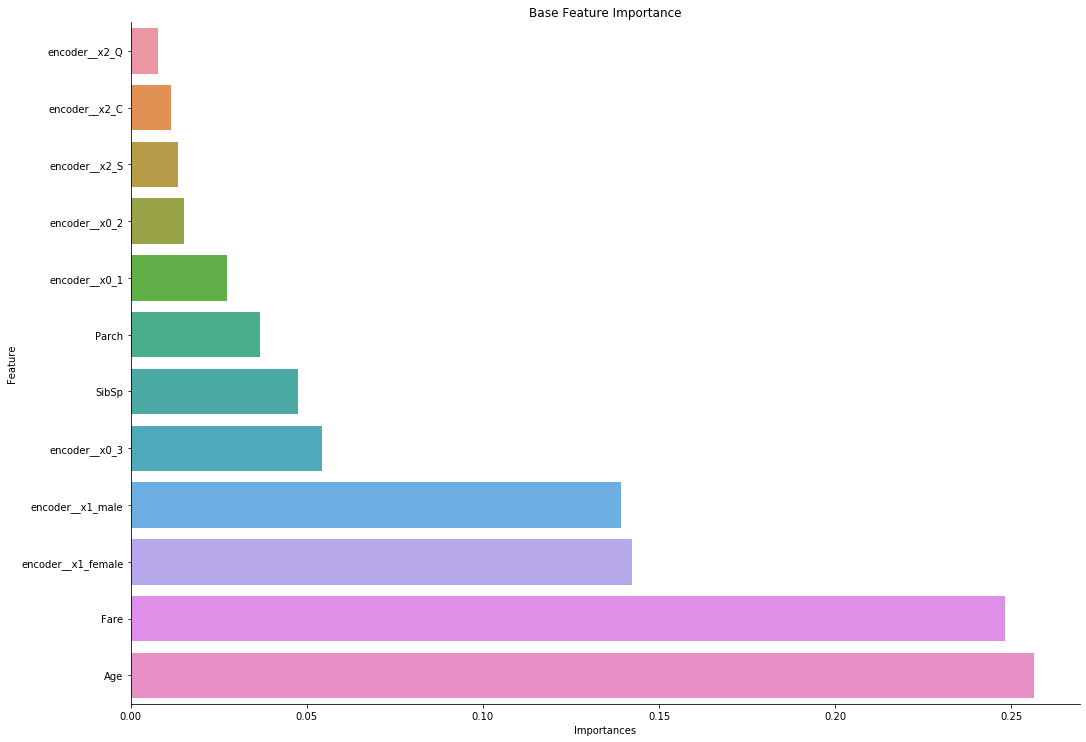

In [31]:
# Feature Importance
fi_df = pd.DataFrame({'Feature':ct.get_feature_names(), 'Importances': rfi_classifier.best_estimator_.feature_importances_})
fi_df.sort_values(by=['Importances'], ascending=True, inplace=True)
sns.catplot(y = 'Feature', x = 'Importances', aspect = 1.5, 
            kind = 'bar', orient = 'h', height = 10, data = fi_df)
plt.title("Base Feature Importance")

#### Base Permutation Importance

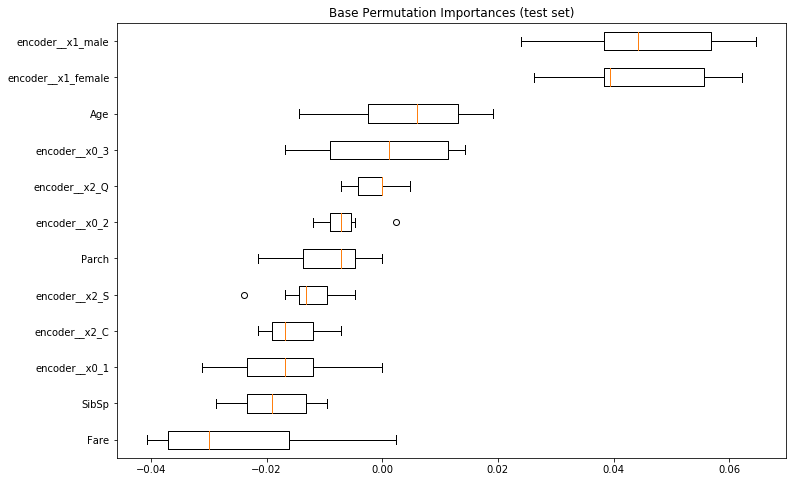

In [32]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rfi_classifier.best_estimator_, X_test, y_test, n_jobs = 2, n_repeats = 10)
pi_features = pd.DataFrame()
pi_features['feature'] = ct.get_feature_names()
pi_features['importance'] = result.importances_mean
pi_features.sort_values(by=['importance'], ascending=True, inplace=True)

#sns.catplot(y = 'feature', x = 'importance', aspect = 1.5, kind = 'bar', orient = 'h',
#            height = 10, data = pi_features)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=[12,8])
x_tr_df = pd.DataFrame(data = X_train, columns = ct.get_feature_names())
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_tr_df.columns[sorted_idx])
plt.title("Base Permutation Importances (test set)")

plt.show()

##### Base Cluster Analysis
Looking for the a clear kink in the curve to indicate that the features plugged in have 2 clear clusters that can be assumed to be Survived or Not Survived.

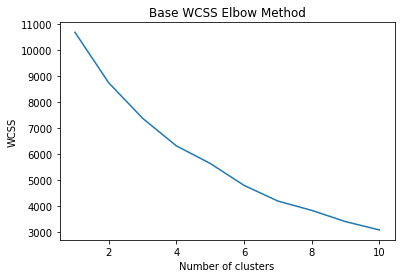

In [33]:
plt.figure(figsize=[6,4])
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Base WCSS Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Base Neural Network Tuning

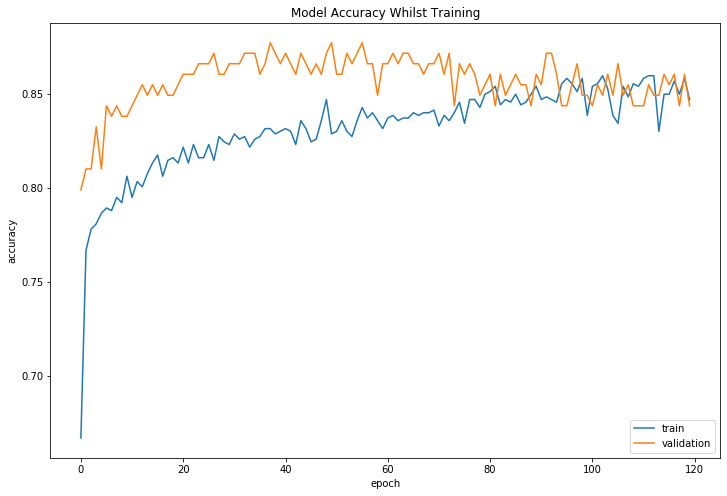

In [34]:
plt.figure(figsize=[12,8])
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model Accuracy Whilst Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

#### Base ROC AUC

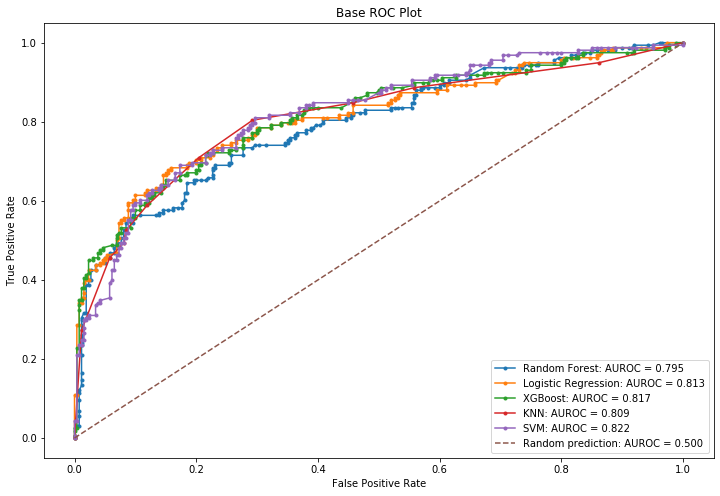

In [35]:
plt.figure(figsize=[12,8])
classifiers = [rfi_classifier, lr_classifier, xgb_classifier,
                knn_classifier, svm_classifier]
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "KNN", "SVM"]
Calc_ROC_AUC(classifiers, classifiers_names, y_test, X_test, "Base")

### Full Set of Features

In [36]:
# Action Pipeline
# Cols that are wanted to go through the fucntion
cols_clean = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",
             "FamilyMembers", "Title", "AgeCat", "Survived"]
train_df_cl = cleaner(train_df, train_df, cols_clean)
test_df_cl = cleaner(test_df, train_df, cols_clean)
X_train, y_train, X_test, y_test, ct = prepare(train_df_cl, test_df_cl, [0, 1, 6, 8, 9])

# All models return classifier, Confusion Matrix, Accuracy Score and y_pred
rfi_classifier, rfi_cm, rfi_ac, rfi_ypd = RFI_classifier(X_train, y_train, X_test, y_test)
lr_classifier, lr_cm, lr_ac, lr_ypd = LR_classifier(X_train, y_train, X_test, y_test)
xgb_classifier, xgb_cm, xgb_ac, xgb_ypd = XGB_classifier(X_train, y_train, X_test, y_test)
per_classifier, per_cm, per_ac, per_ypd = PER_classifier(X_train, y_train, X_test, y_test)
nn_history, nn_model, nn_cm, nn_ac, nn_ypd = NN_classifier(X_train, y_train, X_test, y_test)
kme_classifier, kme_cm, kme_ac, kme_ypd = KME_classifier(X_train, y_train, X_test, y_test)
svm_classifier, svm_cm, svm_ac, svm_ypd = SVM_classifier(X_train, y_train, X_test, y_test)
knn_classifier, knn_cm, knn_ac, knn_ypd = KNN_classifier(X_train, y_train, X_test, y_test)

# Voting Classifier
ballots = [rfi_ypd, lr_ypd, xgb_ypd, per_ypd, np.array(nn_ypd), kme_ypd, svm_ypd]
vot_cm, vot_ac, vot_pred = VOT_classifier(ballots, y_test)

# Model Evaluation DataFrame
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "Perceptron",
                     "Neural Network", "KNN", "SVM", "K-Means", "Voting Classifier"]
confs = [rfi_cm, lr_cm, xgb_cm, per_cm, nn_cm, knn_cm, svm_cm, kme_cm, vot_cm]
ac_results_full = Calc_Metrics(confs, classifiers_names)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilyMembers', 'Title', 'AgeCat'],
      dtype='object')


F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the c

### Full Feature Evaluation

#### Full Metrics

In [37]:
ac_results_full

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.727273,0.272727,0.664557,0.765385,0.765385,0.711416
1,Logistic Regression,0.772727,0.227273,0.727848,0.800000,0.800000,0.762220
2,XGBoost,0.767943,0.232057,0.658228,0.834615,0.834615,0.736001
3,Perceptron,0.602871,0.397129,0.620253,0.592308,0.592308,0.605958
4,Neural Network,0.775120,0.224880,0.715190,0.811538,0.811538,0.760324
5,KNN,0.779904,0.220096,0.677215,0.842308,0.842308,0.750793
6,SVM,0.789474,0.210526,0.696203,0.846154,0.846154,0.763889
7,K-Means,0.251196,0.748804,0.278481,0.234615,0.234615,0.254673
8,Voting Classifier,0.765550,0.234450,0.677215,0.819231,0.819231,0.741484


#### Full Best Parameters

In [38]:
print("Random Forest: " + str(rfi_classifier.best_params_))
print("Logistic regression: " + str(lr_classifier.best_params_))
print("XGBoost: " + str(xgb_classifier.best_params_))
print("SVM: " + str(svm_classifier.best_params_))
print("KNN: " + str(knn_classifier.best_params_))

Random Forest: {'criterion': 'gini', 'n_estimators': 80}
Logistic regression: {'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'verbosity': 0}
SVM: {'C': 1, 'cache_size': 7000, 'kernel': 'rbf', 'probability': True}
KNN: {'algorithm': 'auto', 'n_neighbors': 20}


#### Full Feature Importance
The random forest model allows for the extraction of feature importance, this will allow me to get a subset of features that have a low chance of polluting the model.

Text(0.5, 1, 'Full Feature Importance')

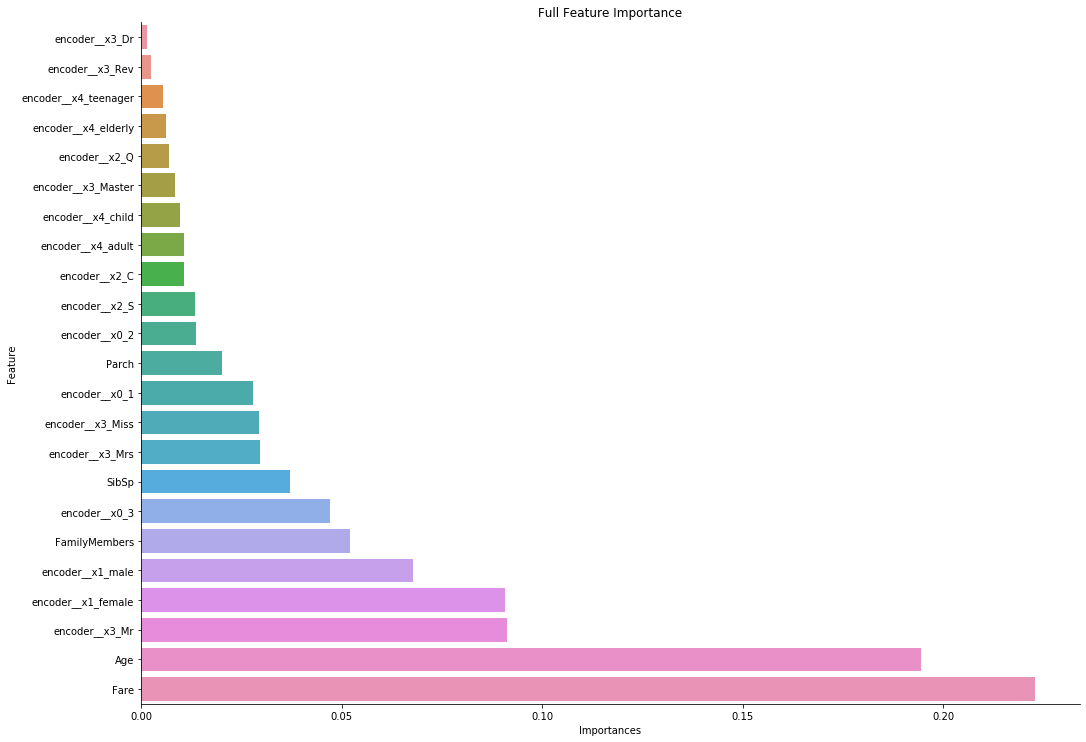

In [39]:
# Feature Importance
fi_df = pd.DataFrame({'Feature':ct.get_feature_names(), 'Importances': rfi_classifier.best_estimator_.feature_importances_})
fi_df.sort_values(by=['Importances'], ascending=True, inplace=True)
sns.catplot(y = 'Feature', x = 'Importances', aspect = 1.5, 
            kind = 'bar', orient = 'h', height = 10, data = fi_df)
plt.title("Full Feature Importance")

#### Full Permutation Importance

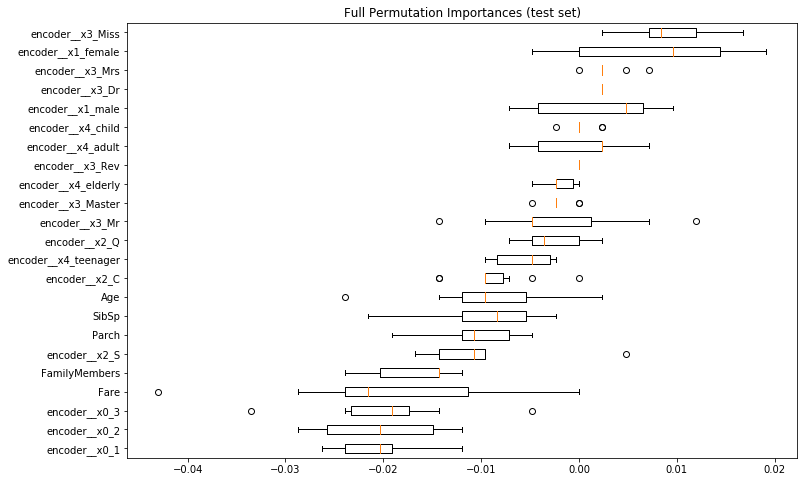

In [40]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rfi_classifier.best_estimator_, X_test, y_test, n_jobs = 2, n_repeats = 10)
pi_features = pd.DataFrame()
pi_features['feature'] = ct.get_feature_names()
pi_features['importance'] = result.importances_mean
pi_features.sort_values(by=['importance'], ascending=True, inplace=True)

#sns.catplot(y = 'feature', x = 'importance', aspect = 1.5, kind = 'bar', orient = 'h',
#            height = 10, data = pi_features)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=[12,8])
x_tr_df = pd.DataFrame(data = X_train, columns = ct.get_feature_names())
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_tr_df.columns[sorted_idx])
plt.title("Full Permutation Importances (test set)")

plt.show()

##### Full Cluster Analysis
Looking for the a clear kink in the curve to indicate that the features plugged in have 2 clear clusters that can be assumed to be Survived or Not Survived.

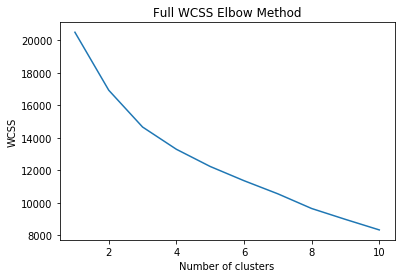

In [41]:
plt.figure(figsize=[6,4])
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Full WCSS Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Full Neural Network Tuning

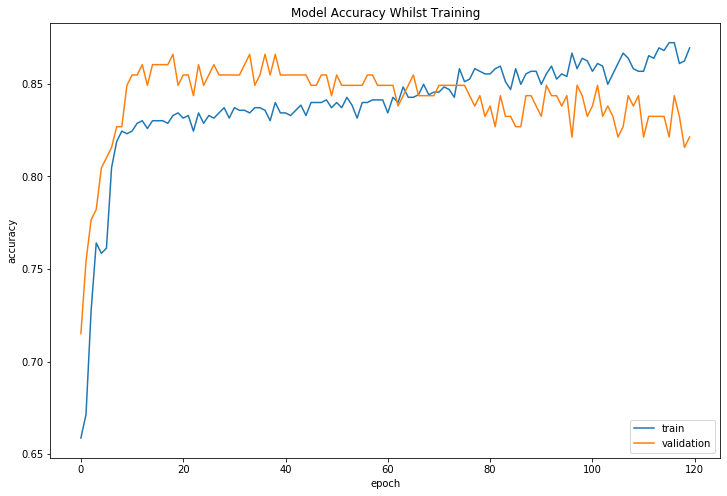

In [42]:
plt.figure(figsize=[12,8])
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model Accuracy Whilst Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

#### Full ROC AUC

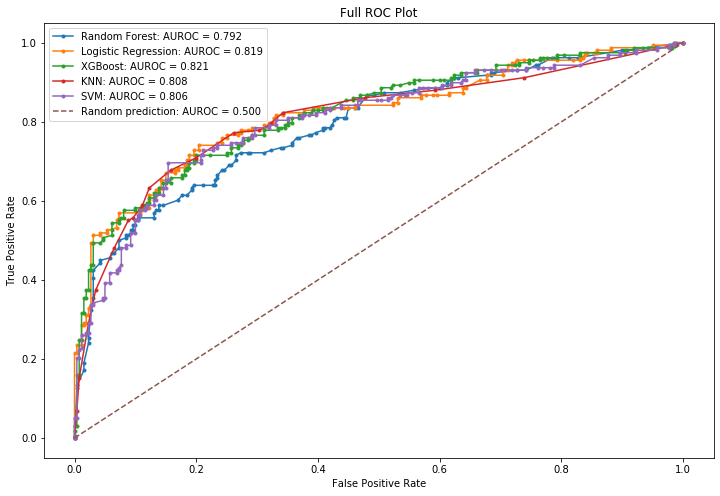

In [43]:
plt.figure(figsize=[12,8])
classifiers = [rfi_classifier, lr_classifier, xgb_classifier,
                knn_classifier, svm_classifier]
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "KNN", "SVM"]
Calc_ROC_AUC(classifiers, classifiers_names, y_test, X_test, "Full")

#### Full Correlations

Text(0.5, 1, 'Feature Correlation')

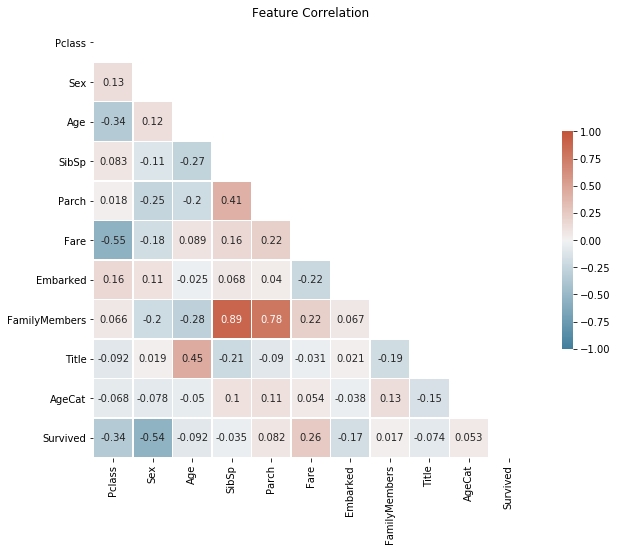

In [44]:
plt.figure(figsize=[12,8])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_df_cl['Sex'] = le.fit_transform(train_df_cl['Sex'])
train_df_cl['Embarked'] = le.fit_transform(train_df_cl['Embarked'])
train_df_cl['Title'] = le.fit_transform(train_df_cl['Title'])
train_df_cl['AgeCat'] = le.fit_transform(train_df_cl['AgeCat'])
cor_df = train_df_cl.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor_df, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_df, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True).set_title("Feature Correlation")

### Subset of Features
Will retain ["AgeCat", "Fare", "Pclass", "Sex", "FamilyMembers", "Survived"], features removed were either deemed not important or were redundant.

In [45]:
# Action Pipeline
# Cols that are wanted to go through the fucntion
cols_clean = ["AgeCat", "Fare", "Sex", "FamilyMembers", "Survived"]
#cols_clean = ["Sex", "Age", "Fare", "Survived"]
#cols_clean = ["AgeCat", "Fare",  "Survived"]

train_df_cl = cleaner(train_df, train_df, cols_clean)
test_df_cl = cleaner(test_df, train_df, cols_clean)
train_df_cl
X_train, y_train, X_test, y_test, ct = prepare(train_df_cl, test_df_cl, [0,2])

# All models return classifier, Confusion Matrix, Accuracy Score and y_pred
rfi_classifier, rfi_cm, rfi_ac, rfi_ypd = RFI_classifier(X_train, y_train, X_test, y_test)
lr_classifier, lr_cm, lr_ac, lr_ypd = LR_classifier(X_train, y_train, X_test, y_test)
xgb_classifier, xgb_cm, xgb_ac, xgb_ypd = XGB_classifier(X_train, y_train, X_test, y_test)
per_classifier, per_cm, per_ac, per_ypd = PER_classifier(X_train, y_train, X_test, y_test)
nn_history, nn_model, nn_cm, nn_ac, nn_ypd = NN_classifier(X_train, y_train, X_test, y_test)
kme_classifier, kme_cm, kme_ac, kme_ypd = KME_classifier(X_train, y_train, X_test, y_test)
svm_classifier, svm_cm, svm_ac, svm_ypd = SVM_classifier(X_train, y_train, X_test, y_test)
knn_classifier, knn_cm, knn_ac, knn_ypd = KNN_classifier(X_train, y_train, X_test, y_test)

# Voting Classifier
ballots = [rfi_ypd, lr_ypd, xgb_ypd, per_ypd, np.array(nn_ypd), kme_ypd, svm_ypd]
vot_cm, vot_ac, vot_pred = VOT_classifier(ballots, y_test)

# Model Evaluation DataFrame
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "Perceptron",
                     "Neural Network", "KNN", "SVM", "K-Means", "Voting Classifier"]
confs = [rfi_cm, lr_cm, xgb_cm, per_cm, nn_cm, knn_cm, svm_cm, kme_cm, vot_cm]
ac_results_red = Calc_Metrics(confs, classifiers_names)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyMembers',
       'Title', 'AgeCat'],
      dtype='object')
Index(['AgeCat', 'Fare', 'Sex', 'FamilyMembers'], dtype='object')


F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [46]:
ac_results_red

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.741627,0.258373,0.658228,0.792308,0.792308,0.719071
1,Logistic Regression,0.760766,0.239234,0.677215,0.811538,0.811538,0.738317
2,XGBoost,0.770335,0.229665,0.696203,0.815385,0.815385,0.751095
3,Perceptron,0.715311,0.284689,0.607595,0.780769,0.780769,0.683382
4,Neural Network,0.763158,0.236842,0.639241,0.838462,0.838462,0.725422
5,KNN,0.763158,0.236842,0.683544,0.811538,0.811538,0.742063
6,SVM,0.779904,0.220096,0.721519,0.815385,0.815385,0.765585
7,K-Means,0.765550,0.234450,0.670886,0.823077,0.823077,0.739230
8,Voting Classifier,0.779904,0.220096,0.721519,0.815385,0.815385,0.765585


In [47]:
print("Random Forest: " + str(rfi_classifier.best_params_))
print("Logistic regression: " + str(lr_classifier.best_params_))
print("XGBoost: " + str(xgb_classifier.best_params_))
print("SVM: " + str(svm_classifier.best_params_))
print("KNN: " + str(knn_classifier.best_params_))

Random Forest: {'criterion': 'gini', 'n_estimators': 100}
Logistic regression: {'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'verbosity': 0}
SVM: {'C': 2, 'cache_size': 7000, 'kernel': 'rbf', 'probability': True}
KNN: {'algorithm': 'auto', 'n_neighbors': 5}


#### Sub Feature Importance
The random forest model allows for the extraction of feature importance, this will allow me to get a subset of features that have a low chance of polluting the model.

F:\Programs\Anaconda\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Sub Feature Importance')

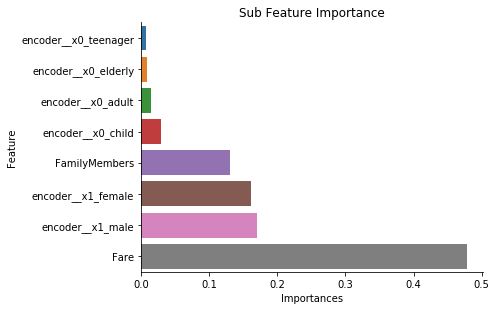

In [48]:
# Feature Importance

fi_df = pd.DataFrame({'Feature':ct.get_feature_names(), 'Importances': rfi_classifier.best_estimator_.feature_importances_})
fi_df.sort_values(by=['Importances'], ascending=True, inplace=True)
#plt.figure(figsize=(18,4))
sns.catplot(y = 'Feature', x = 'Importances', aspect = 1.7, 
            kind = 'bar', orient = 'h', height = 10, data = fi_df, size = 4)
plt.title("Sub Feature Importance")


#### Sub Permutation Importance

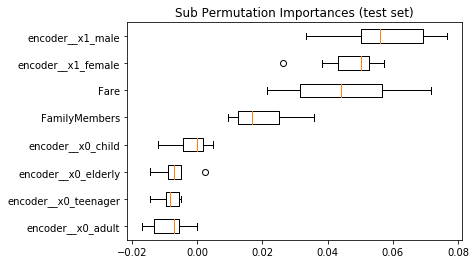

In [49]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rfi_classifier.best_estimator_, X_test, y_test, n_jobs = 2, n_repeats = 10)
pi_features = pd.DataFrame()
pi_features['feature'] = ct.get_feature_names()
pi_features['importance'] = result.importances_mean
pi_features.sort_values(by=['importance'], ascending=True, inplace=True)

#sns.catplot(y = 'feature', x = 'importance', aspect = 1.5, kind = 'bar', orient = 'h',
#            height = 10, data = pi_features)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=[6,4])
x_tr_df = pd.DataFrame(data = X_train, columns = ct.get_feature_names())
plt.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_tr_df.columns[sorted_idx])
plt.title("Sub Permutation Importances (test set)")

plt.show()

##### Sub Cluster Analysis
Looking for the a clear kink in the curve to indicate that the features plugged in have 2 clear clusters that can be assumed to be Survived or Not Survived.

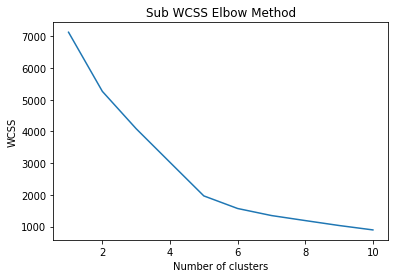

In [50]:
plt.figure(figsize=[6,4])
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Sub WCSS Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Sub Neural Network Tuning

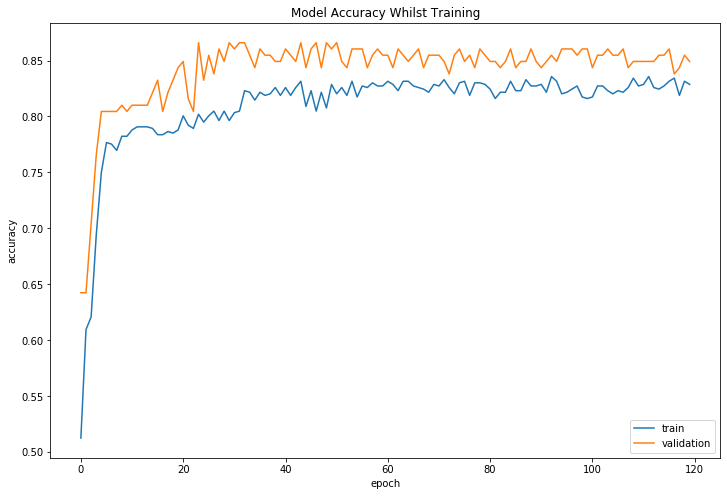

In [51]:
plt.figure(figsize=[12,8])
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Model Accuracy Whilst Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

#### Sub ROC AUC

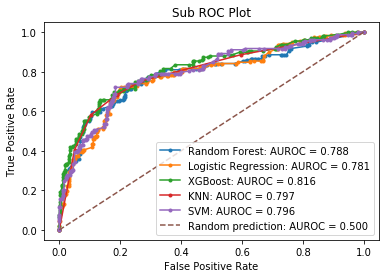

In [52]:
plt.figure(figsize=[6,4])
classifiers = [rfi_classifier, lr_classifier, xgb_classifier,
                knn_classifier, svm_classifier]
classifiers_names = ["Random Forest", "Logistic Regression", "XGBoost", "KNN", "SVM"]
Calc_ROC_AUC(classifiers, classifiers_names, y_test, X_test, "Sub")

# SCORES SUMMARY

In [53]:
ac_results_base

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.729665,0.270335,0.658228,0.773077,0.773077,0.711045
1,Logistic Regression,0.775120,0.224880,0.683544,0.830769,0.830769,0.750000
2,XGBoost,0.767943,0.232057,0.651899,0.838462,0.838462,0.733503
3,Perceptron,0.641148,0.358852,0.708861,0.600000,0.600000,0.649903
4,Neural Network,0.772727,0.227273,0.689873,0.823077,0.823077,0.750611
5,KNN,0.770335,0.229665,0.588608,0.880769,0.880769,0.705643
6,SVM,0.779904,0.220096,0.594937,0.892308,0.892308,0.713893
7,K-Means,0.236842,0.763158,0.322785,0.184615,0.184615,0.234888
8,Voting Classifier,0.772727,0.227273,0.645570,0.850000,0.850000,0.733813


In [54]:
ac_results_full

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.727273,0.272727,0.664557,0.765385,0.765385,0.711416
1,Logistic Regression,0.772727,0.227273,0.727848,0.800000,0.800000,0.762220
2,XGBoost,0.767943,0.232057,0.658228,0.834615,0.834615,0.736001
3,Perceptron,0.602871,0.397129,0.620253,0.592308,0.592308,0.605958
4,Neural Network,0.775120,0.224880,0.715190,0.811538,0.811538,0.760324
5,KNN,0.779904,0.220096,0.677215,0.842308,0.842308,0.750793
6,SVM,0.789474,0.210526,0.696203,0.846154,0.846154,0.763889
7,K-Means,0.251196,0.748804,0.278481,0.234615,0.234615,0.254673
8,Voting Classifier,0.765550,0.234450,0.677215,0.819231,0.819231,0.741484


In [55]:
ac_results_red

,Model,Accuracy,Miss-Class,Sensitivity,Specificity,Precision,F1
0,Random Forest,0.741627,0.258373,0.658228,0.792308,0.792308,0.719071
1,Logistic Regression,0.760766,0.239234,0.677215,0.811538,0.811538,0.738317
2,XGBoost,0.770335,0.229665,0.696203,0.815385,0.815385,0.751095
3,Perceptron,0.715311,0.284689,0.607595,0.780769,0.780769,0.683382
4,Neural Network,0.763158,0.236842,0.639241,0.838462,0.838462,0.725422
5,KNN,0.763158,0.236842,0.683544,0.811538,0.811538,0.742063
6,SVM,0.779904,0.220096,0.721519,0.815385,0.815385,0.765585
7,K-Means,0.765550,0.234450,0.670886,0.823077,0.823077,0.739230
8,Voting Classifier,0.779904,0.220096,0.721519,0.815385,0.815385,0.765585


In [56]:
rfi_ac

0.7416267942583732

In [57]:
y_test.groupby(y_test).count()

Survived
0    260
1    158
Name: Survived, dtype: int64